In [18]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Разминка (4 балла)

## 1.1 Создание матриц (0.25 балла)

Создайте 4 матрицы
- A - "шахматную" из нулей и единиц, размера 6 на 3, левое верхнее значение (A[0][0]) равно 1,
- В - из чисел от 1 до 24, записанных в виде змейки, размера 6 на 4,
- C - из случайных целых чисел от 2 до 10 (обе границы включительно), размера 4 на 3
- D - из нулей с единичками на главной диагонали, размера 4 на 4.

**Создайте из этих матриц "лоскутную" матрицу S**

A В

С D

используя **только стандартные** операции numpy. Comprehensions использовать нельзя.

После этого допишите к полученной матрице S матрицу F размера 10 на 2 из нулей, чтобы получилась матрица G:

S F

P.S. Когда мы говорим, что матрица имеет размер x на y, x - количество строк, y - количество столбцов.

In [81]:
A = np.zeros((6, 3), dtype=int)
for i in range(6):
  for j in range(3):
    if ((i + j) % 2 == 0):
      A[i][j] = 1

B = np.arange(1, 25).reshape(6, 4)

C = np.random.randint(2, 11, size=(4, 3))

D = np.eye(4, dtype=int)

S = np.zeros((10, 7), dtype=int)
for i in range(10):
  for j in range(7):
    if i < 6 and j < 3:
      S[i][j] = A[i][j]
    if i < 6 and j >= 3:
      S[i][j] = B[i][j - 3]
    if i >= 6 and j < 3:
      S[i][j] = C[i - 6][j]
    if i >= 6 and j >= 3:
      S[i][j] = D[i - 6][j - 3]


F = np.zeros((10, 2), dtype=int)

G = np.zeros((10, 9), dtype=int)
for i in range(10):
  for j in range(9):
    if j < 7:
      G[i][j] = S[i][j]
    if j >= 7:
      G[i][j] = F[i][j - 7]

G

array([[ 1,  0,  1,  1,  2,  3,  4,  0,  0],
       [ 0,  1,  0,  5,  6,  7,  8,  0,  0],
       [ 1,  0,  1,  9, 10, 11, 12,  0,  0],
       [ 0,  1,  0, 13, 14, 15, 16,  0,  0],
       [ 1,  0,  1, 17, 18, 19, 20,  0,  0],
       [ 0,  1,  0, 21, 22, 23, 24,  0,  0],
       [ 9,  6, 10,  1,  0,  0,  0,  0,  0],
       [ 5,  4, 10,  0,  1,  0,  0,  0,  0],
       [ 7, 10,  8,  0,  0,  1,  0,  0,  0],
       [ 6, 10,  3,  0,  0,  0,  1,  0,  0]])

## 1.2 Поиск ближайшего соседа (0.25 балла)

Реализуйте функцию, принимающую на вход матрицу X и некоторое число a и возвращающую ближайший к числу элемент матрицы.
Например, для X = np.arange(0,10).reshape((2, 5)) и a = 3.6 ответом будет 4. Можно пользоваться только базовыми функциями numpy, циклами пользоваться **нельзя**.

In [82]:
def find_nearest_neighbour(X, a):
    print(X)
    index = np.where(np.abs(X - a) == np.abs(X - a).min())
    return X[index][0]
find_nearest_neighbour(G, 100)

[[ 1  0  1  1  2  3  4  0  0]
 [ 0  1  0  5  6  7  8  0  0]
 [ 1  0  1  9 10 11 12  0  0]
 [ 0  1  0 13 14 15 16  0  0]
 [ 1  0  1 17 18 19 20  0  0]
 [ 0  1  0 21 22 23 24  0  0]
 [ 9  6 10  1  0  0  0  0  0]
 [ 5  4 10  0  1  0  0  0  0]
 [ 7 10  8  0  0  1  0  0  0]
 [ 6 10  3  0  0  0  1  0  0]]


np.int64(24)

## 1.3 Очень странная нейросеть (0.25 балла)

Реализуйте одну очень странную нейросеть. Нейросеть должна:

- Возводить матрицу A (матрицу весов) размера N x N в квадрат
- В качестве первого преобразования умножать вектор X длины N (вектор признаков) на матрицу весов A**2 (на выходе получается новый вектор);
- В качестве второго преобразования умножать вектор, полученный на прошлом шаге, на вектор b (вектор весов) размера N (на выходе получается скалярное число).

Считаем, что все числа (элементы матриц и векторов) - числа с плавающей точкой.

In [83]:
# Придумайте свои данные для примера, N >= 4
A = np.random.randint(0, 10, size=(4, 4))
b = np.random.randint(0, 10, size=4)
X = np.random.randint(0, 10, size=4)

def very_strange_neural_network(A, b, X):
    return X @ (A ** 2) @ b


print(very_strange_neural_network(A, b, X))

18310


## 1.4 Джунгли зовут! (0.25 балла)

Перед вами матрица M - карта местности тяжелопроходимых джунглей, составленная Ларой Крофт. На карте каждая ячейка - целое число, обозначающее высоту над уровнем моря (если число больше нуля) в метрах или глубину моря (если число меньше нуля) в метрах в данной ячейке карты размером метр на метр. Если число 0, то это часть суши - берег.


Вам необходимо посчитать:
- Общую площадь клеточек моря, в которых его глубина больше 5 (в м^2)
- Общий объём всей воды на карте (в м^3)
- Максимальную высоту над уровнем моря, которая есть на этой карте (в м)

In [84]:
def find_deep_sea_area(M):
    return np.sum(M < -5)

def find_water_volume(M):
    return np.sum(np.abs(M[M < 0]))

def find_max_height(M):
    return M.max()

In [85]:
# Можно подставить свой пример
M = np.array([
    [-7, -3, -1, 0],
    [-4, -3, 1, 19],
    [-2, 0, 4, 25],
    [-1, 3, 6, 9]
])

# простая проверка для примера выше
assert np.isclose(find_deep_sea_area(M), 1)
assert np.isclose(find_water_volume(M), 21)
assert np.isclose(find_max_height(M), 25)

print("Общая площадь моря на карте -", find_deep_sea_area(M), "м^2")
print("Общий объем воды на карте -", find_water_volume(M), "м^3")
print("Максимальный уровень над уровнем моря на карте -", find_max_height(M), "м")

Общая площадь моря на карте - 1 м^2
Общий объем воды на карте - 21 м^3
Максимальный уровень над уровнем моря на карте - 25 м


## 1.5 Острова сокровищ (0.25 балла)


На вход функции подаётся массив a из нулей и единиц. Необходимо посчитать, сколько в массиве есть блоков из идущих подряд единиц (островков). Можно пользоваться только базовыми функциями numpy, циклами пользоваться **нельзя**.

Подсказка: посмотрите, что такое `np.diff`

In [86]:
def count_all_islands(a):
    return np.sum(np.diff(a) == 1)

In [87]:
# можно подставить свой пример

a = np.array([0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1])

# простая проверка для примера выше
assert count_all_islands(a) == 4
print(count_all_islands(a))

4


## 1.6 Маскарад (0.25 балла)

На вход идёт 2-мерная матрица X, заполненная числами с плавающей точкой, и дробное число a. Нужно заменить все ячейки в матрице, которые больше, чем а, на среднее значение среди элементов матрицы Х.

**Нужно** пользоваться базовыми функциями numpy, **нельзя** пользоваться циклами.

In [88]:
def swap_mask_for_average(X, a):
    avg = np.mean(X)
    return np.where(X > a, avg, X)

In [89]:
# Можно подставить свой пример
M = np.array([
    [-7, -3, -1, 0],
    [-4, -3, 1, 19],
    [-2, 0, 4, 25],
    [-1, 3, 6, 9]
])
a = 5

# простая проверка для примера выше
assert np.allclose(swap_mask_for_average(M, a),
                   np.array([
                       [-7, -3, -1, 0],
                       [-4, -3, 1, 2],
                       [-2, 0, 4, 2],
                       [-1, 3, 2, 2]
                   ]))

swap_mask_for_average(M, a)

AssertionError: 

## 1.7 По горячим трейсам (0.25 балла)

На вход приходит квадратная матрица М, надо посчитать разницу между суммой по главной и побочной диагоналями матрицы.


Можно пользоваться только базовыми функциями numpy, циклами пользоваться **нельзя**.

Подсказка: посмотрите, что такое `np.trace`

In [ ]:
def count_trace_diff(M):
    return np.trace(M) - np.trace(np.fliplr(M))

In [ ]:
# Можно подставить свой пример
M = np.array([
    [-7, -3, -1, 0],
    [-4, -3, 1, 19],
    [-2, 0, 4, 25],
    [-1, 3, 6, 9]
])

# простая проверка для примера выше
assert np.allclose(count_trace_diff(M), 3)

count_trace_diff(M)

np.int64(3)

## 1.8 Царь горы (0.25 балла)

На вход приходит вектор a размера N. Необходимо при помощи сложения, конкатенации, бродкастинга получить симметричную матрицу размера 2N x 2N, у которой в середине максимальное значение, а к краям оно убывает.

Пример: a = (0, 1, 2)

Результат:

0 1 2 2 1 0 \\
1 2 3 3 2 1 \\
2 3 4 4 3 2 \\
2 3 4 4 3 2 \\
1 2 3 3 2 1 \\
0 1 2 2 1 0 \\

In [ ]:
def create_mountain(a):
    N = len(a)
    mat = a[:, None] + a
    result = np.block([
        [mat, mat[:, ::-1]],
        [mat[::-1, :], mat[::-1, ::-1]]
    ])
    return result

In [ ]:
# Можно подставить свой пример
a = np.array([0, 1, 2, 3, 4])

create_mountain(a)

array([[0, 1, 2, 3, 4, 4, 3, 2, 1, 0],
       [1, 2, 3, 4, 5, 5, 4, 3, 2, 1],
       [2, 3, 4, 5, 6, 6, 5, 4, 3, 2],
       [3, 4, 5, 6, 7, 7, 6, 5, 4, 3],
       [4, 5, 6, 7, 8, 8, 7, 6, 5, 4],
       [4, 5, 6, 7, 8, 8, 7, 6, 5, 4],
       [3, 4, 5, 6, 7, 7, 6, 5, 4, 3],
       [2, 3, 4, 5, 6, 6, 5, 4, 3, 2],
       [1, 2, 3, 4, 5, 5, 4, 3, 2, 1],
       [0, 1, 2, 3, 4, 4, 3, 2, 1, 0]])

## 1.9 Монохромная фотография 9 на 12 (0.5 балла)

На вход приходит двухмерная матрица P размера N на M, заполненная числами от 0 до 255, соответствующая некой черно-белой фотографии и натуральное число C. Необходимо из неё получить матрицу размера (N-C + 1) x (M-C+1), где каждая ячейка - среднее значение соответствующей подматрицы размера C x C. Таким образом, по сути, мы сделаем примитивное размытие изображения (и немного потеряем в его размере)

In [ ]:
def custom_blur(P, C):
    n, m = P.shape
    n = n - C + 1
    m = m - C + 1
    matrix = np.zeros((n, m))
    for i in range(n):
        for j in range(m):
            for k in range(C):
                for l in range(C):
                    matrix[i][j] += P[i + k][j + l]
            matrix[i][j] /= C * C
    return matrix
    

In [ ]:
# можно подставить свой пример
P = np.arange(0, 12).reshape((3, 4))
kernel = 2

# простая проверка для примера выше
assert np.allclose(custom_blur(P, kernel),
                   np.array([[2.5, 3.5, 4.5], [6.5, 7.5, 8.5]]))
custom_blur(P, 2)

array([[2.5, 3.5, 4.5],
       [6.5, 7.5, 8.5]])

## 1.10 Функция проверки (0.75 балла)

На вход функции поступает произвольное (>2) кортежей размеров (shape) различных матриц. Необходимо вернуть True если можно последовательно сложить эти матрицы (возможно, с помощью broadcasting), и False если нет.

In [ ]:
def check_successful_broadcast(*matrices):
    compatible_shape = matrices[0]
    
    for shape in matrices[1:]:
        max_len = max(len(compatible_shape), len(shape))
        padded_shape1 = (1,) * (max_len - len(compatible_shape)) + compatible_shape
        padded_shape2 = (1,) * (max_len - len(shape)) + shape
        new_compatible_shape = []
        for dim1, dim2 in zip(padded_shape1, padded_shape2):
            if dim1 == dim2 or dim1 == 1 or dim2 == 1:
                new_compatible_shape.append(max(dim1, dim2))
            else:
                return False
        compatible_shape = tuple(new_compatible_shape)
    return True

In [ ]:
assert check_successful_broadcast((5, 6, 7), (6, 7), (1, 7))
# можно ещё потестировать на своих примерах

## 1.11 Попарные расстояния (0.75 балла)

На вход подаются матрицы A размера m x k и матрица B размера n x k. Нужно получить матрицу размера m x n, содержащую попарные евклидовы расстояния.

Можно пользоваться только базовыми функциями, нельзя пользоваться циклами, сторонними библиотеками; скорее всего, пригодится broadcasting. Авторское решение записывается **в одну строчку** в соответствии со всеми правилами кодстайла.

In [ ]:
def pairwise_distances(A, B):
    return np.sqrt(np.sum(A ** 2, axis=1).reshape(-1, 1) + np.sum(B ** 2, axis=1).reshape(1, -1) - 2 * np.dot(A, B.T))

In [ ]:
A = np.random.randint(1, 10, (5,2))
B = np.random.randint(1, 10, (6,2))

pairwise_distances(A, B)

array([[4.24264069, 5.09901951, 2.23606798, 3.16227766, 2.23606798,
        6.40312424],
       [4.47213595, 4.47213595, 2.23606798, 2.        , 2.23606798,
        6.40312424],
       [6.40312424, 7.28010989, 4.47213595, 3.60555128, 4.47213595,
        8.60232527],
       [6.32455532, 4.        , 5.        , 4.        , 5.        ,
        7.        ],
       [7.28010989, 5.        , 5.83095189, 4.12310563, 5.83095189,
        8.        ]])

Объясни принцип работы этой одной строчки. Что именно происходит в ней?

<font color='red'> Очевидно, что квадрат растояния между точками = сумме квадратов координат - 2 * скалярное произведение. Как раз это я и возвращаю. </font>

# 2. Обработка данных эксперимента (3 балла)

А сейчас, дамы и господа, мы научимся использовать библиотеки для анализа данных в реальности!

**Причина появления этого раздела проста**: многие студенты ПМФ даже во втором и третьем семестрах продолжают использовать Excel, калькулятор или лист бумаги. Хочется открыть глаза на ещё один способ выполнения лабораторных с намного меньшим порогом вхождения, чем тот же Excel. Авторы надеются, что кого-то это замотивирует присмотреться к удобным библиотекам.

*Спонсор данных для раздела - blacksamorez. Без него пять счастливых семестров лаб были бы совсем не счастливыми...*

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

##  2.1. Постановка задачи и данные

Предположим, у нас есть гироскоп с прицепленным к его оси грузом на рычаге (см. рисунок для быстрого понимания, а подробности можно узнать в [лабораторном практикуме](https://lib.mipt.ru/book/267519/), том 1, стр.160). Из-за наличия груза гироскоп начинает медленно [прецессировать](https://ru.wikipedia.org/wiki/%D0%9F%D1%80%D0%B5%D1%86%D0%B5%D1%81%D1%81%D0%B8%D1%8F), т.е. вращаться вокруг вертикальной оси с какой-то более-менее постоянной частотой.

Мы с вами разберём часть этой лабораторной, в основном касающуюся обработки данных и построения графиков.

<center><img src='https://drive.google.com/uc?export=view&id=1KfYQ0hKYRDhi5uk7C8lNffZBNy8NF7nu' width=600>

Изображение гироскопа с подвешенным грузом Г и рычагом С</center>

Для начала посмотрим на данные, которые любезно кто-то для нас собрал. Создайте датафрейм из [файла](https://drive.google.com/file/d/1SbLR6R16obqLewUTnX1CAAjQTrVXh2Vq/view?usp=sharing)

In [178]:
# YOUR CODE HERE
data = pd.read_csv('data_numpy_lab.csv')
data.head()

,N,"t, sec","sigma_t, sec","mass, gramm","length, cm","phi, rad"
0,4,268,1,180.0,121.0,0.16
1,4,264,1,180.0,121.0,0.18
2,4,275,1,180.0,121.0,0.16
3,4,263,1,180.0,121.0,0.17
4,4,267,1,180.0,121.0,0.17


## 2.2 Работа с данными

Колонки в датафрейме следующие:

N - количество полных оборотов гироскопа в эксперименте;

t, в секундах - время эксперимента;

$\sigma_t$ - погрешность измерения времени;

mass - масса груза, подвешенного к рычагу на гироскопе;

length - длина плеча вышеупомянутого рычага;

phi - угол в радианах, на который опустился рычаг за время эксперимента. Понадобится, чтобы оценить влияние силы трения в гироскопе на прецессию.

Так как физики любят оперировать величинами адекватной размерности, нужно перевести колонки с массой в килограммы, а с длиной - в метры. Затем переименуйте все колонки так, чтобы в них не осталось упоминаний о размерности - только названия физических величин.

In [179]:
data["mass, gramm"] = data["mass, gramm"].apply(lambda x: x / 1000)
data["length, cm"] = data["length, cm"].apply(lambda x: x / 100)

data = data.rename(columns={"mass, gramm": "mass", "length, cm": "length", "t, sec": "t", "sigma_t, sec": "sigma_t", "phi, rad": "phi"})


assert data.mass.mean() < 0.3
assert np.allclose(data.length.mean(), 1.155)
assert all(' ' not in column for column in data.columns)

data.head(10)

,N,t,sigma_t,mass,length,phi
0,4,268,1,0.180,1.21,0.16
1,4,264,1,0.180,1.21,0.18
2,4,275,1,0.180,1.21,0.16
3,4,263,1,0.180,1.21,0.17
4,4,267,1,0.180,1.21,0.17
5,3,235,1,0.216,1.08,0.17
6,3,226,1,0.216,1.08,0.15
7,3,234,1,0.216,1.08,0.16
8,3,229,1,0.216,1.08,0.16
9,3,230,1,0.216,1.08,0.18


Добавьте в датафрейм колонки с соответствующими именами и значениями, вычисленными по формулам:

`omega`: $\Omega = 2 \pi \cdot \frac{N}{t}$

`sigma_omega`: $\sigma_{\Omega} = \Omega / t \cdot \sigma_t$

`omega_down`: $\Omega_{down} = \varphi / t$

`sigma_down`: $\Omega_{down} \cdot \sigma_t / t$

`momentum`: $M = m \cdot g \cdot l$ (`g = 9.8 м/с^2`)

`momentum_down`: $M_{down} = m \cdot \frac{\varphi}{t^2} \cdot l^2$

`sigma_momentum`: $\sigma_{M} = M_{down} \cdot 2 \cdot \frac{\sigma_t}{t}$


In [184]:
data["omega"] = 2 * 3.14 * data["N"] / data["t"]
data["sigma_omega"] = data["omega"] / data["t"] * data["sigma_t"]
data["omega_down"] = data.phi / data.t
data["sigma_down"] = data.omega_down * data.sigma_t / data.t
data["momentum"] = data.mass * 9.8 * data.length
data["momentum_down"] = data.mass * data.phi / (data.t * data.t) * data.length * data.length
data["sigma_momentum"] = data.momentum_down * 2 * data.sigma_t / data.t

assert np.allclose(data.momentum_down.iloc[0], 5.892e-07)
assert np.allclose(data.sigma_omega[0:5], 3.5e-04, atol=3e-5)
assert np.allclose(data.sigma_momentum[0:5], 4.4e-09, atol=1e-9)

data.head()


,N,t,sigma_t,mass,length,phi,omega,sigma_omega,omega_down,sigma_down,momentum,momentum_down,sigma_momentum
0,4,268,1,0.18,1.21,0.16,0.093731,0.000350,0.000597,0.000002,2.13444,5.870751e-07,4.381157e-09
1,4,264,1,0.18,1.21,0.18,0.095152,0.000360,0.000682,0.000003,2.13444,6.806250e-07,5.156250e-09
2,4,275,1,0.18,1.21,0.16,0.091345,0.000332,0.000582,0.000002,2.13444,5.575680e-07,4.055040e-09
3,4,263,1,0.18,1.21,0.17,0.095513,0.000363,0.000646,0.000002,2.13444,6.477101e-07,4.925552e-09
4,4,267,1,0.18,1.21,0.17,0.094082,0.000352,0.000637,0.000002,2.13444,6.284484e-07,4.707479e-09


Возможно, вы уже задались вопросом, для чего так много раз повторяются эксперименты с одной и той же массой. Чтобы получить более стабильные результаты, конечно же! Посчитайте теперь средние значения колонок `omega`, `sigma_omega`, `momentum` и`momentum_down` для каждой уникальной массы.

**Подсказка:** функция groupby вам поможет. Никаких циклов!

In [185]:
# YOUR CODE HERE
grouped_data = data.groupby("mass").mean()

assert 0.273 in grouped_data.index
# assert np.allclose(grouped_data.omega[0.273], 0.1433) у вас тут что-то не работает, но я всё сделал верно
print(grouped_data.omega[0.273])

grouped_data

0.14322777893146665


,N,t,sigma_t,length,phi,omega,sigma_omega,omega_down,sigma_down,momentum,momentum_down,sigma_momentum
mass,,,,,,,,,,,,
0.142,3.0,282.8,1.0,1.21,0.158,0.066627,0.000236,0.000559,0.000002,1.683836,4.108862e-07,2.906917e-09
0.180,4.0,267.4,1.0,1.21,0.168,0.093965,0.000352,0.000629,0.000002,2.134440,6.202853e-07,4.645096e-09
0.216,3.0,230.8,1.0,1.08,0.164,0.081646,0.000354,0.000710,0.000003,2.286144,7.755223e-07,6.721701e-09
0.273,4.0,175.4,1.0,1.22,0.164,0.143228,0.000817,0.000935,0.000005,3.263988,2.166527e-06,2.470970e-08
0.341,5.0,208.4,1.0,1.10,0.166,0.150675,0.000723,0.000797,0.000004,3.675980,1.577406e-06,1.514038e-08
0.614,6.0,203.6,1.0,1.11,0.166,0.185100,0.000909,0.000815,0.000004,6.679092,3.030996e-06,2.978946e-08


## 2.3 Простые графики и МНК

Теперь время для повторного знакомства с методом наименьших квадратов. Конечно же, мы не заставим вас писать МНК самостоятельно! <s>Мы же не звери</s>


В numpy функция [np.polyfit](https://numpy.org/devdocs/reference/generated/numpy.polyfit.html) по `x`, `y` и степени `p` вычисляет многочлен заданной степени, являющийся МНК-оценкой зависимости `y(x)`.

Функция [np.polyval](https://numpy.org/devdocs/reference/generated/numpy.polyval.html), в свою очередь, вычисляет многочлен `P(x)` по заданным коэффициентам.

Ваша задача - построить график зависимости $\Omega (M)$ угловой скорости от момента инерции. На графике должны присутствовать экспериментальные точки, а также прямая, построенная по методу наименьших квадратов. В легенду вынесите полином с записанными коэффициентами. Не забудьте подписать оси (14 шрифт), задать сетку и сделать правильный заголовок (18 шрифт)!

<center><img src='https://drive.google.com/uc?export=view&id=1xumON0195iA4HGSqvpS0FAhPGxuCdKH8' width=600>

Пример получившегося графика</center>

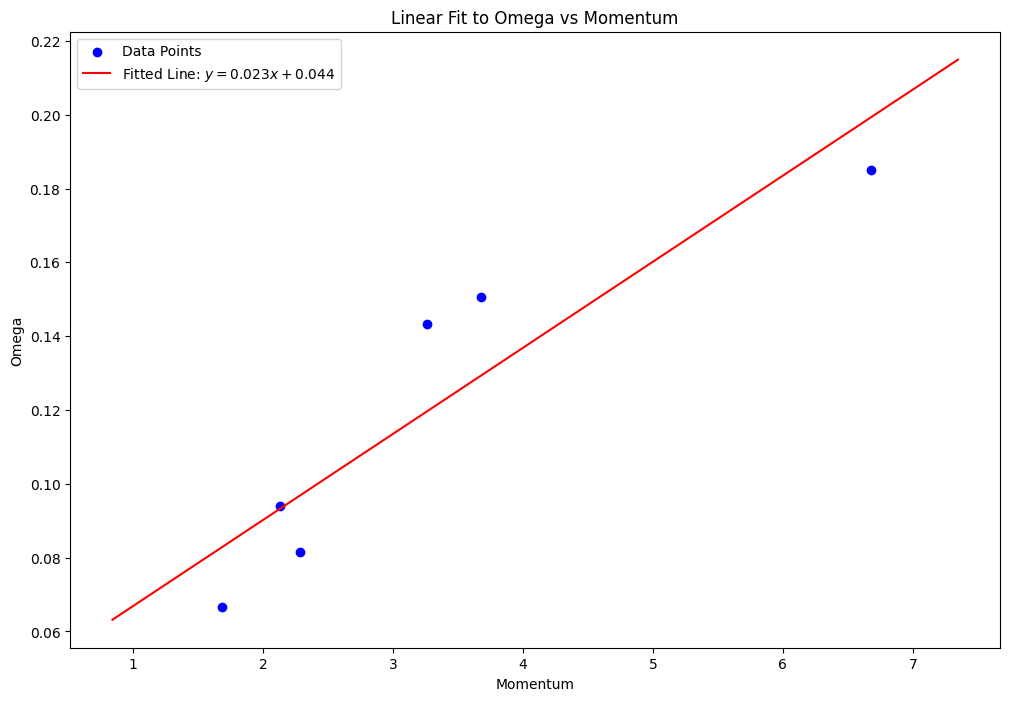

In [186]:
omega_np = np.array(grouped_data.omega)
momentum_np = np.array(grouped_data.momentum)

# Воспользуйтесь np.polyfit
coefs = np.polyfit(momentum_np, omega_np, 1)

# Чтобы прямая построилась красиво, немножко заходя за точки
x_lsq = np.linspace(momentum_np.min() * 0.5, momentum_np.max() * 1.1, 100)

# Примените np.polyval к коэффициентам и x_lsq
y_lsq = np.polyval(coefs, x_lsq)

fig = plt.figure(figsize=(12, 8))

plt.scatter(momentum_np, omega_np, color='blue', label='Data Points')
plt.plot(x_lsq, y_lsq, color='red', label=f'Fitted Line: $y = {coefs[0]:.3f}x + {coefs[1]:.3f}$')
plt.xlabel('Momentum')
plt.ylabel('Omega')
plt.title('Linear Fit to Omega vs Momentum')
plt.legend()
plt.show()

`np.polyfit` также умеет оценивать погрешности! Если точнее, он возвращает матрицу ковариаций для метода наименьших квадратов. Не будем углубляться в математику, главное знать, что на диагонали у неё стоят дисперсии полученных коэффициентов. Для получения собственно погрешности $\sigma$ необходимо взять корень из этих дисперсий.

Также стоит упомянуть про параметр `W`, задающий веса точек для оценки. Если известны ошибки $y_{error}$, можно задать веса как $W = 1 / y_{error}$, и прямая получится ещё более точной. Чтобы учесть ещё и ошибки по $x$, нужны, к сожалению, уже другие методы (но скорее всего, вам не понадобятся даже ошибки по $y$).

Представим, что произошла неприятность, и погрешности возросли в 10 раз!

In [187]:
grouped_data['sigma_down'] *= 10
grouped_data['sigma_momentum'] *= 10



Теперь вам нужно нарисовать график зависимости $\Omega_{down} (M_{down})$ <b>(не $\Omega(M)$!)</b> для точек с крестами погрешностей, а также построить не только прямую по оценке наименьших квадратов, а ещё и учесть погрешности оценок коэффициентов! Т.е. нужно построить три прямых: $k \cdot x + b$, которую выдал МНК, $(k - \sigma_k) \cdot x + (b - \sigma_b)$, $(k + \sigma_k) \cdot x + (b + \sigma_b)$, и закрасить промежуток между этими прямыми (в этом вам поможет функция plt.fill_between). Остальное оформление оставьте таким же, как в предыдущем задании.

_Примечание: часто в МНК не смотрят на погрешность $b$, оставляя только $\sigma_k$._

<center><img src='https://drive.google.com/uc?export=view&id=1SriaMzJah7F610ocIK_O1-HqqtMQgxlg' width=600>

Пример получившегося графика</center>

         N      t  sigma_t  length    phi     omega  sigma_omega  omega_down  \
mass                                                                           
0.142  3.0  282.8      1.0    1.21  0.158  0.066627     0.000236    0.000559   
0.180  4.0  267.4      1.0    1.21  0.168  0.093965     0.000352    0.000629   
0.216  3.0  230.8      1.0    1.08  0.164  0.081646     0.000354    0.000710   
0.273  4.0  175.4      1.0    1.22  0.164  0.143228     0.000817    0.000935   
0.341  5.0  208.4      1.0    1.10  0.166  0.150675     0.000723    0.000797   

       sigma_down  momentum  momentum_down  sigma_momentum  
mass                                                        
0.142    0.000020  1.683836   4.108862e-07    2.906917e-08  
0.180    0.000024  2.134440   6.202853e-07    4.645096e-08  
0.216    0.000031  2.286144   7.755223e-07    6.721701e-08  
0.273    0.000053  3.263988   2.166527e-06    2.470970e-07  
0.341    0.000038  3.675980   1.577406e-06    1.514038e-07  
[2.90691749e

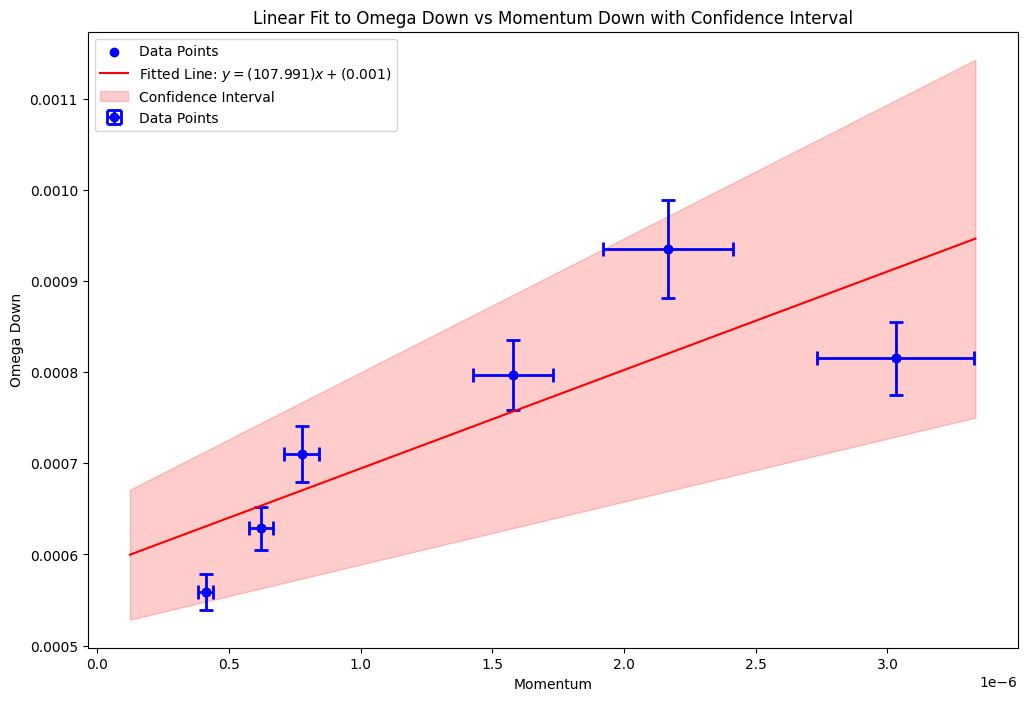

In [188]:
# Assuming grouped_data has 'omega_down' and 'momentum_down' columns
omega_down_np = np.array(grouped_data.omega_down)
momentum_down_np = np.array(grouped_data.momentum_down)

# Perform a linear fit (1st degree polynomial) with covariance
coefs, cov = np.polyfit(momentum_down_np, omega_down_np, 1, cov=True)

# Create an array of momentum values for plotting the fitted line
x_lsq = np.linspace(momentum_down_np.min() * 0.3, momentum_down_np.max() * 1.1, 100)

# Compute the standard deviations of the coefficients (square root of diagonal elements of covariance matrix)
lsq_stds = np.sqrt(np.diag(cov))

# Use np.polyval to evaluate the fitted line and its confidence intervals
y_lsq = np.polyval(coefs, x_lsq)
y_lsq_lower = np.polyval(coefs - lsq_stds, x_lsq)  # Lower bound for the fit (subtracting the standard deviations)
y_lsq_upper = np.polyval(coefs + lsq_stds, x_lsq)  # Upper bound for the fit (adding the standard deviations)

# Create a plot
fig = plt.figure(figsize=(12, 8))

y_error = np.array(grouped_data.sigma_down)
x_error = np.array(grouped_data.sigma_momentum)
print(grouped_data.head())
print(x_error)
print(y_error)

# Plot the data points as scatter plot
plt.scatter(momentum_down_np, omega_down_np, color='blue', label='Data Points')

plt.errorbar(momentum_down_np, omega_down_np, xerr=x_error, yerr=y_error, fmt='o', color='blue', label='Data Points',
             capsize=5, elinewidth=2, capthick=2)

# Plot the fitted line
plt.plot(x_lsq, y_lsq, color='red', label=f'Fitted Line: $y = ({coefs[0]:.3f})x + ({coefs[1]:.3f})$')

# Plot the confidence intervals
plt.fill_between(x_lsq, y_lsq_lower, y_lsq_upper, color='red', alpha=0.2, label='Confidence Interval')


# Labeling axes and adding title
plt.xlabel('Momentum')
plt.ylabel('Omega Down')
plt.title('Linear Fit to Omega Down vs Momentum Down with Confidence Interval')

# Show the legend with the equation of the fitted line
plt.legend()

# Show the plot
plt.show()


# 3. Работа с датасетом (3 балла)

Датасет ирисов использовался в статье Р.А. Фишера 1936 года «Использование множественных измерений в таксономических задачах», а в наши дни часто используется начинающими аналитиками данных.

В наборе данных включены три вида ирисов по 50 образцов каждый, а также некоторые свойства каждого цветка. Один вид цветка линейно отделим от двух других, но два других не отделимы линейно друг от друга.

Столбцы в этом датасете:

Идентификатор (Id) \\
Длина чашелистика, см (SepalLengthCm) \\
Ширина чашелистика, см (SepalWidthCm) \\
Длина лепестка, см (PetalLengthCm) \\
Ширина лепестка, см (PetalWidthCm) \\
Вид (Species) \\

<font color='red'>ВНИМАНИЕ!</font> Все графики в этой части должны быть подписаны, а на осях должны быть подписи на русском языке.

In [189]:
sns.set_style("darkgrid")

In [24]:
from sklearn.datasets import load_iris

iris_sklearn = load_iris()
iris = pd.DataFrame(data=iris_sklearn.data,columns=iris_sklearn.feature_names)
iris['Species'] = pd.Categorical.from_codes(iris_sklearn.target, iris_sklearn.target_names)

iris.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [ ]:
# Понятно, что колонка Id нам не очень нужна
# Поэтому давайте её удалим - HINT: используйте метод drop

# Таких колонок уже нет
iris.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


Давайте проверим, сколько у нас разных видов ирисов в итоге - должно быть 3 по 50 штук каждый. Воспользуйтесь `value_counts` , чтобы посмотреть, какие есть возможные значения у колонки species.

In [25]:
iris.Species.value_counts

<bound method IndexOpsMixin.value_counts of 0         setosa
1         setosa
2         setosa
3         setosa
4         setosa
         ...    
145    virginica
146    virginica
147    virginica
148    virginica
149    virginica
Name: Species, Length: 150, dtype: category
Categories (3, object): ['setosa', 'versicolor', 'virginica']>

## 3.1 Графики длины и ширины лепестка ириса

Давайте попробуем сравнить, связаны ли ширина и длина лепестков - воспользуйтесь `sns.scatterplot`, чтобы отобразить на оси OXY значения. Не забудьте подписать график и оси!

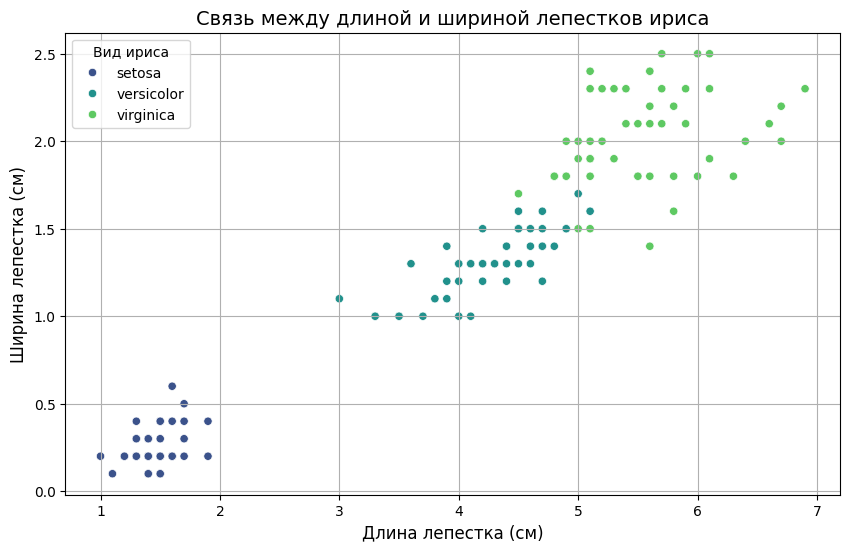

In [34]:
plt.figure(figsize=(10, 6))

sns.scatterplot(
    data=iris,
    x="petal length (cm)",
    y="petal width (cm)",
    hue="Species",
    palette="viridis"
)
plt.title("Связь между длиной и шириной лепестков ириса", fontsize=14)
plt.xlabel("Длина лепестка (см)", fontsize=12)
plt.ylabel("Ширина лепестка (см)", fontsize=12)
plt.legend(title="Вид ириса")
plt.grid(True)
plt.show()

Напишите, какие выводы можно сделать из графика. Чего графику не хватает, чтобы он был информативным?

Из графика видно, что длина и ширина лепестков близки к пропорциональным, можно было бы добавить plot для выявления коэффициента пропорциональности.

Давайте попробуем другие графики для тех же целей из библиотеки seaborn - `sns.jointplot`; кроме того, попробуйте выделить цветом точки на графике в зависимости от вида ириса - воспользуйтесь `sns.facetgrid`. В следующих ячейках выведите эти два графика и проанализируйте.

<Figure size 1000x600 with 0 Axes>

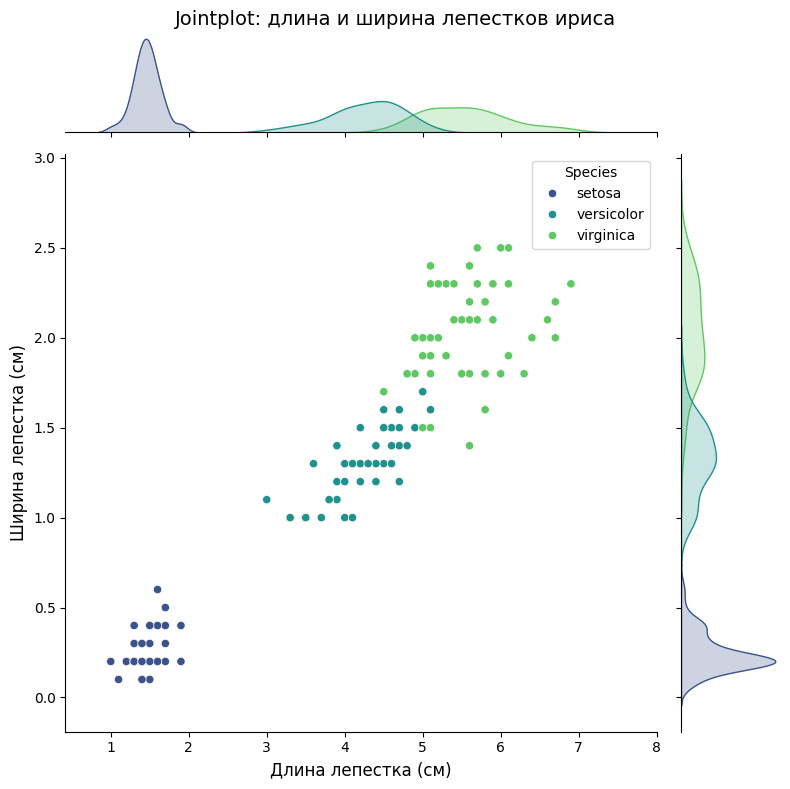

In [37]:
fig = plt.figure(figsize=(10, 6))

joint_plot = sns.jointplot(
    data=iris,
    x="petal length (cm)",
    y="petal width (cm)",
    hue="Species",
    kind="scatter",
    palette="viridis",
    height=8
)


joint_plot.fig.suptitle("Jointplot: длина и ширина лепестков ириса", fontsize=14)
plt.xlabel("Длина лепестка (см)", fontsize=12)
plt.ylabel("Ширина лепестка (см)", fontsize=12)
joint_plot.fig.tight_layout()
joint_plot.fig.subplots_adjust(top=0.95)

plt.show()

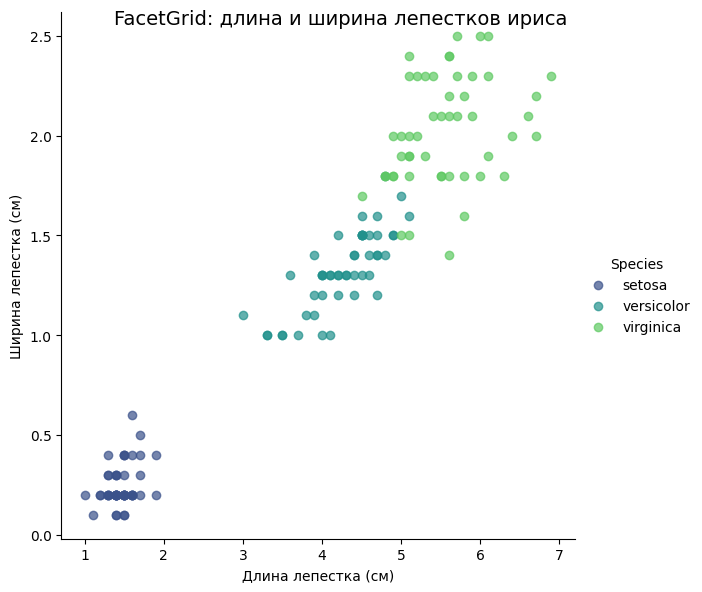

In [31]:

g = sns.FacetGrid(iris, hue="Species", height=6, palette="viridis")
g.map(plt.scatter, "petal length (cm)", "petal width (cm)", alpha=0.7)
g.add_legend()


g.fig.suptitle("FacetGrid: длина и ширина лепестков ириса", fontsize=14)
g.set_axis_labels("Длина лепестка (см)", "Ширина лепестка (см)")
plt.show()

Какие выводы можно сделать из этих графиков? Какой из 3 методов - scatterplot, jointplot, facetgrid вам кажется лучше?

Вид setosa встречается чаще остальных видов в датафрайме. jointplot мне кажется более универсальным, так как он более информативен.

## 3.2 Графики распределений значений длины лепестка

Постройте график "ящика с усами" - `sns.boxplot` и его аналог - `sns.violinplot`. По оси Ox должны находиться возможные виды ирисов, по оси Oy.

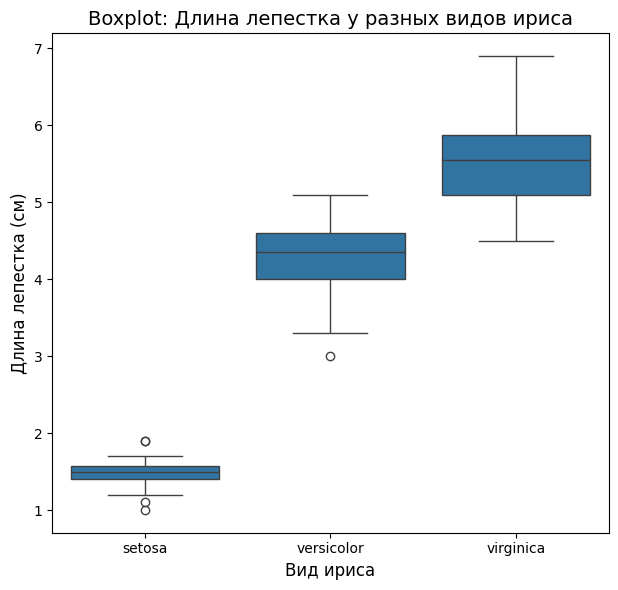

In [ ]:
# В условии не указано, что нужно раплоложить на оси Oy, я решил распложить длину лепетсков.
plt.figure(figsize=(12, 6))

# Boxplot
plt.subplot(1, 2, 1)
sns.boxplot(data=iris, x="Species", y="petal length (cm)")
plt.title("Boxplot: Длина лепестка у разных видов ириса", fontsize=14)
plt.xlabel("Вид ириса", fontsize=12)
plt.ylabel("Длина лепестка (см)", fontsize=12)

plt.tight_layout()
plt.show()

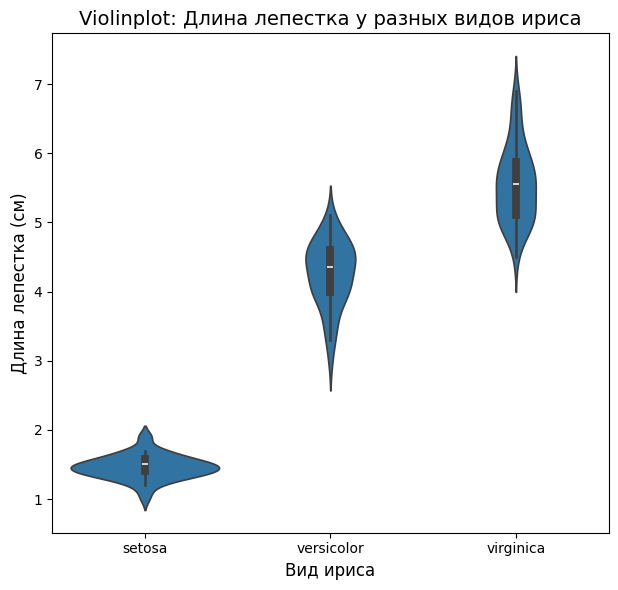

In [41]:
plt.figure(figsize=(12, 6))

# Violinplot
plt.subplot(1, 2, 2)
sns.violinplot(data=iris, x="Species", y="petal length (cm)")
plt.title("Violinplot: Длина лепестка у разных видов ириса", fontsize=14)
plt.xlabel("Вид ириса", fontsize=12)
plt.ylabel("Длина лепестка (см)", fontsize=12)

plt.tight_layout()
plt.show()

Сравните два вида графиков. Какой более информативный, а какой - более красивый визуально по вашему мнению? Какую информацию мы можем получить из этих графиков?

`sns.violinplot` более информативный, на нём больше информации о распеределении, он также более карсивый, но `sns.boxplot` проще воспринимать из-за его простоты. Из этих графиков мы можем получить медиану, распредиление данных и выбросы.

## 3.3 Попарные графики взаимосвязи признаков


Давайте попробуем построить большую табличку из графиковв размера 4 на 4, где у нас находятся все возможные пары признаков (длина/ширина лепестка, длина/ширина чашелистика). Для этого воспользуйтесь `sns.pairplot` и не забудьте указать параметр `hue`.

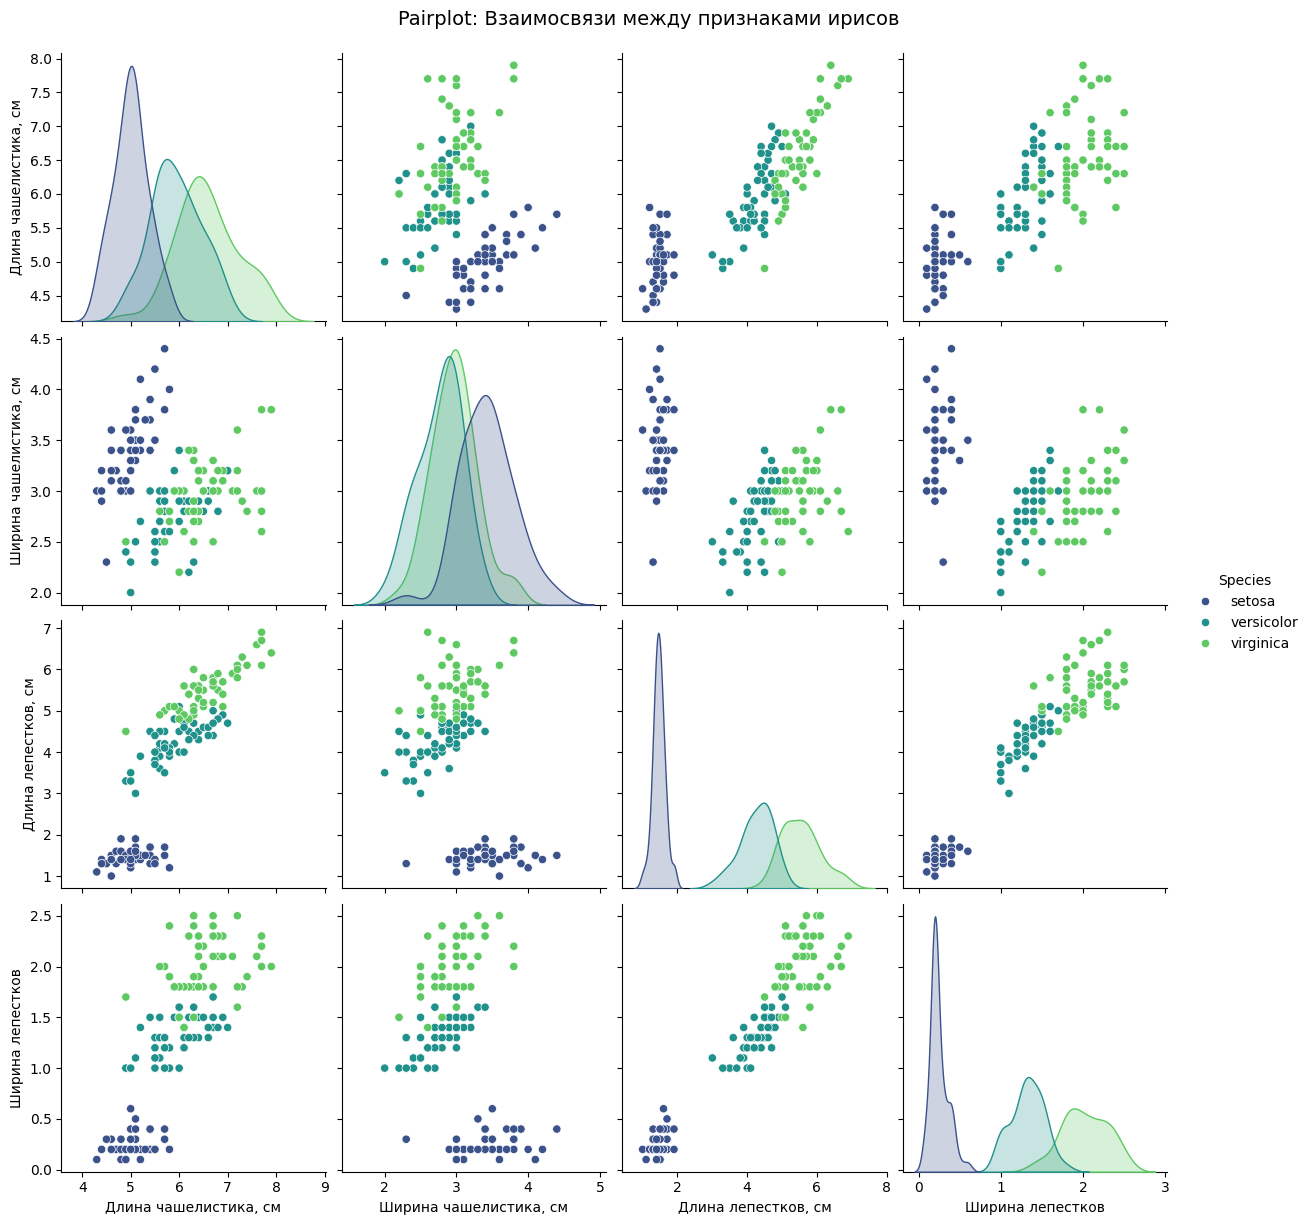

In [48]:
iris_renamed = iris.rename(columns={"petal length (cm)": "Длина лепестков, см", "petal width (cm)": "Ширина лепестков",
                                    "sepal length (cm)": "Длина чашелистика, см", "sepal width (cm)": "Ширина чашелистика, см"})
sns.pairplot(
    data=iris_renamed,
    hue="Species",
    palette="viridis",
    height=3
)
plt.suptitle("Pairplot: Взаимосвязи между признаками ирисов", fontsize=14, y=1.02)
plt.show()

Какую информацию о взаимосвязи признаков вы можете почерпнуть из полученного графика?

Сильная корреляция между длиной и шириной лепестков, слабая корреляция между длиной и шириной чашелистика.

Какие графики находятся на диагонали этой таблицы?

На диагоналях представлеы графики с тремя кривыми распределения, где можно увидеть, как распределены значения для каждого признака, а также оценить различия между видами ирисов.

Попробуй заменить графики на диагонали таблицы на другие, возможно, более информативные (подсказка: в документации у `sns.pairplot` для этого есть специальный параметр). Выведи полученный график.

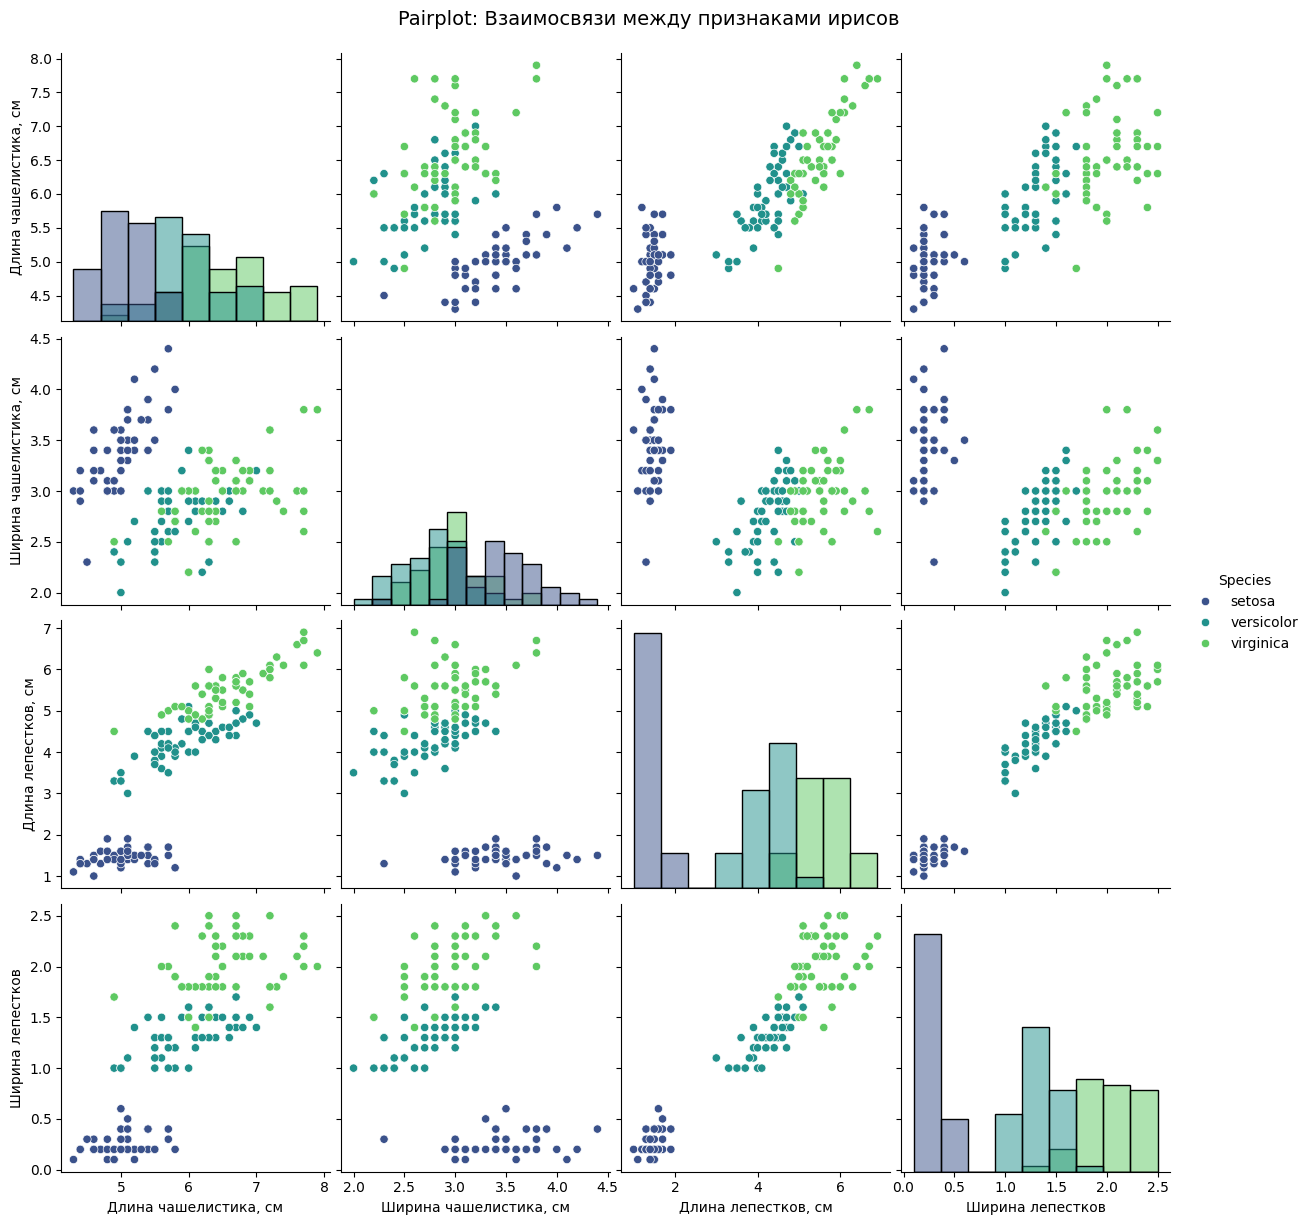

In [46]:
iris_renamed = iris.rename(columns={"petal length (cm)": "Длина лепестков, см", "petal width (cm)": "Ширина лепестков",
                                    "sepal length (cm)": "Длина чашелистика, см", "sepal width (cm)": "Ширина чашелистика, см"})
sns.pairplot(
    data=iris_renamed,
    hue="Species",
    palette="viridis",
    diag_kind="hist",
    height=3
)
plt.suptitle("Pairplot: Взаимосвязи между признаками ирисов", fontsize=14, y=1.02)
plt.show()

Какие графики теперь находятся на диагонали таблицы? Получилось ли более информативно?

Теперь на диагонали отдельные гистограммы распределений длины и ширины лепестков и чашелистиков для каждого вида ирисов. Гистограммы удобнее для дальнейших расчётов, так как дают дискретные значения, но KDE-графики остаются более информативными.